In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from Encoder import Encode
from sklearn.preprocessing import StandardScaler

In [77]:
Data = pd.read_csv('train.csv')


X = Data[['Artist Reputation', 'Weight', 'Price Of Sculpture', 'Base Shipping Price','International', 'Express Shipment',
                 'Fragile', 'Remote Location', 'Transport']]

Y = Data['Cost'].abs()

X['Artist Reputation'].fillna(value=X['Artist Reputation'].mean(), inplace=True)
X['Weight'].fillna(value=X['Weight'].mean(), inplace=True)
X['Remote Location'].fillna(value='missing_RL', inplace=True)
X['Transport'].fillna(value='missing_Transport', inplace=True)

X['Artist Reputation'] = np.expm1(X['Artist Reputation'])
X['Weight'] = np.log1p(X['Weight'])
X['Price Of Sculpture'] = np.log1p(X['Price Of Sculpture'])

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=.20)

X_Train.info()
print('\n_______________________________\n')
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 186 to 1968
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Reputation    5200 non-null   float64
 1   Weight               5200 non-null   float64
 2   Price Of Sculpture   5200 non-null   float64
 3   Base Shipping Price  5200 non-null   float64
 4   International        5200 non-null   object 
 5   Express Shipment     5200 non-null   object 
 6   Fragile              5200 non-null   object 
 7   Remote Location      5200 non-null   object 
 8   Transport            5200 non-null   object 
dtypes: float64(4), object(5)
memory usage: 406.2+ KB

_______________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 5702 to 1871
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Reputation    1300 non-null   flo

In [79]:
X_Train, X_Test = Encode(X_Train, X_Test)
print(X_Train.dtypes)

Artist Reputation      float64
Weight                 float64
Price Of Sculpture     float64
Base Shipping Price    float64
International            int64
Express Shipment         int64
Fragile                  int64
Remote Location          int64
Transport                int64
dtype: object


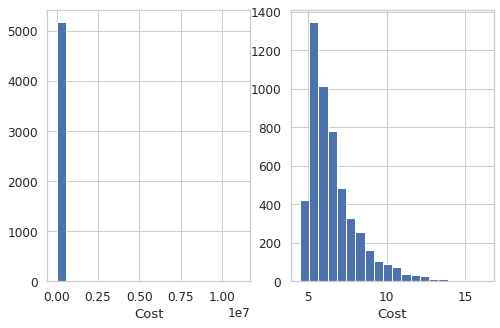

In [65]:
fig, axs = plt.subplots(ncols=2)

#Target variable
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(Y_Train, norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs[0]);
sns.distplot(np.log1p(Y_Train), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs[1]);

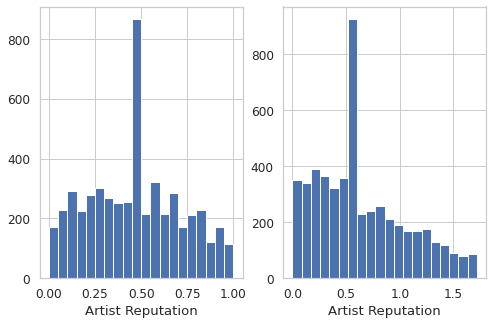

In [66]:
fig2, axs2 = plt.subplots(ncols=2)

#Artist Reputation
sns.distplot(X_Train['Artist Reputation'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs2[0]);
sns.distplot(np.expm1(X_Train['Artist Reputation']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs2[1]);

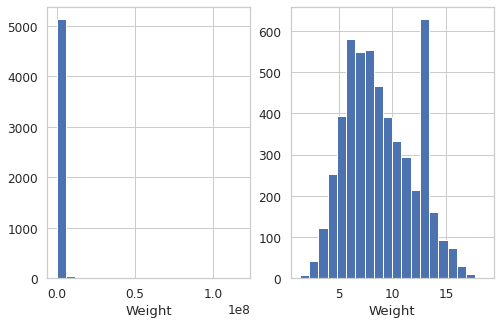

In [67]:
fig3, axs3 = plt.subplots(ncols=2)

#Weight
sns.distplot(X_Train['Weight'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs3[0]);
sns.distplot(np.log1p(X_Train['Weight']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs3[1]);

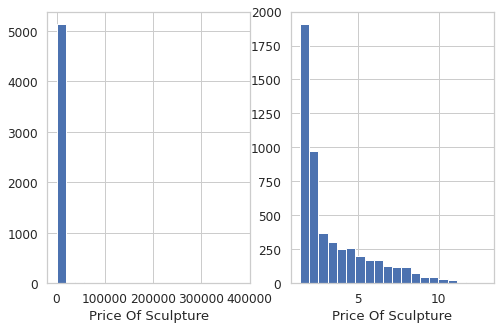

In [68]:
fig, axs = plt.subplots(ncols=2)

#Price of Sculpture
sns.distplot(X_Train['Price Of Sculpture'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs[0]);
sns.distplot(np.log1p(X_Train['Price Of Sculpture']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}, ax=axs[1]);

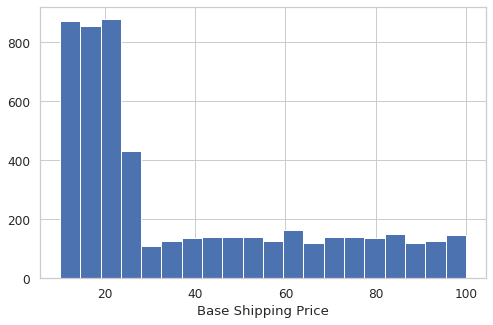

In [69]:
#Base Shipping Price
sns.distplot(X_Train['Base Shipping Price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1});

<AxesSubplot:xlabel='Artist Reputation', ylabel='Cost'>

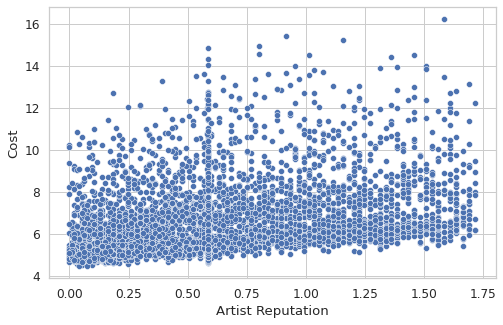

In [24]:
sns.scatterplot(x=np.expm1(X_Train['Artist Reputation']), y=np.log1p(Y_Train))

<AxesSubplot:xlabel='Weight', ylabel='Cost'>

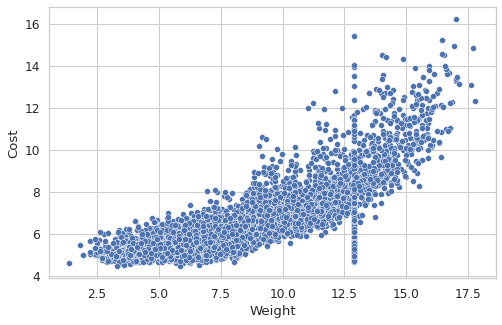

In [25]:
sns.scatterplot(x=np.log1p(X_Train['Weight']), y=np.log1p(Y_Train))

<AxesSubplot:xlabel='Price Of Sculpture', ylabel='Cost'>

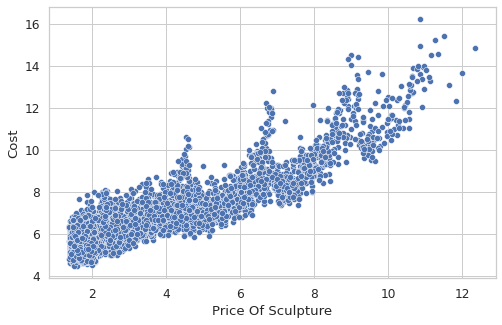

In [26]:
sns.scatterplot(x=np.log1p(X_Train['Price Of Sculpture']), y=np.log1p(Y_Train))

<AxesSubplot:xlabel='Base Shipping Price', ylabel='Cost'>

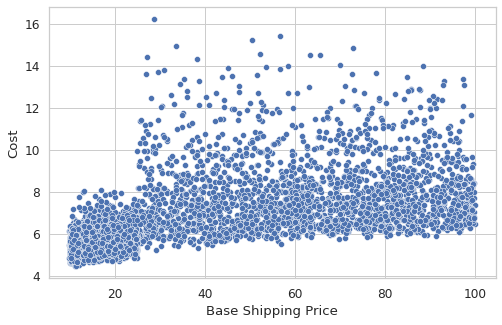

In [27]:
sns.scatterplot(x=X_Train['Base Shipping Price'], y=np.log1p(Y_Train))

In [83]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()

RFR.fit(X_Train, np.log1p(Y_Train))
GBR.fit(X_Train, np.log1p(Y_Train))

print(RFR.score(X_Test, np.log1p(Y_Test)))
print(GBR.score(X_Test, np.log1p(Y_Test)))

0.9471967687545837
0.9457666208487083


In [84]:
import xgboost as xg

XGR = xg.XGBRegressor()
XGR.fit(X_Train, np.log1p(Y_Train))

print(XGR.score(X_Test, np.log1p(Y_Test)))

0.9549593881998084


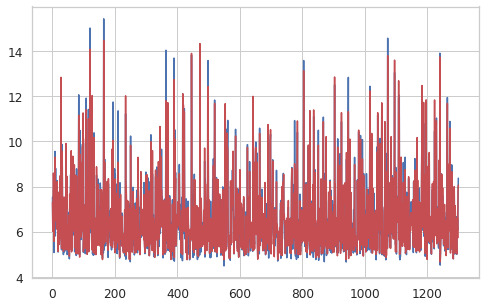

In [90]:
Predictions_RFR = RFR.predict(X_Test)

plt.plot([i for i in range(len(Y_Test))], np.log1p(Y_Test), 'b-', label='actual')
plt.plot([i for i in range(len(Y_Test))], Predictions_RFR, 'r-', label='predicted')